## Second Research Question : effect of dataset balance in label 0 and 1

In the second question, we focus on observing the effect of the balance of different classes, in the training and the test set. We analyse the trade-off between reducing the number of datapoints in the training points to balance the classes and thus reducing the number of training points and keeping a high number of training points in the dataset, regardless of the class unbalance.

### Real-world dataset study : the impact of unbalancing the training set and the trade-off with having as many as possible data points in the training set 

### The dataset

The dataset we have is composed of 3561 micro-calcifications of 96 patients that has/had cancer or not (specified in the last column with 0 : no cancer and 1 : cancer). Each micro-calcification has as first feature, the patient on who we observed it, then 150 different features measurable, and last but not least, a label indicating if the patient has/had cancer or not.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


np.random.seed(42)

We load the data

In [4]:
raw_data = pd.read_excel("data_breast_cancer.xlsx").to_numpy()

In [5]:
print("Number of feature:",len(raw_data[0]))
print("Number of micro-calcification:", len(raw_data[:,0]))

Number of feature: 152
Number of micro-calcification: 3562


Separating our data from the label needed for supervised learning. We also discard the feature "patient" that won't be usefull in our study

In [6]:
X, y = raw_data[:,1:(len(raw_data[0])-1)], raw_data[:,len(raw_data[0])-1:len(raw_data[0])]
y=y.ravel()
y

array([0., 0., 0., ..., 1., 1., 1.])

In [7]:
X_label_0,y_label_0 = X[y==0],y[y==0]
X_label_1,y_label_1 = X[y==1],y[y==1]

print("Number of label 0: ",len(y_label_0))
print("Number of label 1: ",len(y_label_1))

Number of label 0:  2020
Number of label 1:  1542


We see that we have an unbalance data, but not a lot of data points. The goal here is to test 3 configurations : 

* We balance the training dataset, and use 478 data points having label 0 for the test set. 
* We keep the same proportion of label 0 and 1 in the training and the test set, we keep a high number of data points 
* We do a trade-off between the two cases above

We will use as a model for learning the SVM Machine Learning algorithm

In [9]:
def SVM(training_set,test_set,labels_training,labels_test):
    scaler = StandardScaler()
    scaler.fit(training_set)
    training_set_standardized = scaler.transform(training_set)
    model = SVC(gamma='auto')
    model.fit(training_set_standardized, labels_training.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = accuracy_score(labels_test,y_pred)
    score_false_negativ = 0
    for i in range(len(labels_test)):
        if labels_test[i] and not(y_pred[i]):
            score_false_negativ+=1
    return test_error,score_false_negativ,model

We setup global variables to record the results to plot them afterwards

In [10]:
nb_dataset_studied = 3
accuracy_scores = np.zeros(nb_dataset_studied)
false_negativ_scores = np.zeros(nb_dataset_studied)

Above is written the learning algorithm for the three cases studied. We split the data in data with label 0 and 1, we take the proportion we want from each classfor the training and test set, then we shuffle everything and fit the SVM Model. We collect the test errors in a list and compare them in a table

We choose as error metrics, the accuracy score, a "false negativ score" which calculate the number of false negatives divided by the number of positive cases. 

In [11]:
X_label_0_train, X_test, y_label_0_train, y_test = train_test_split(X_label_0,y_label_0,test_size=(len(y_label_0)-len(y_label_1))/len(y_label_0))
X_train = np.concatenate([X_label_0_train,X_label_1])
y_train = np.concatenate([y_label_0_train,y_label_1])

print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))


train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]
test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[0] = test_error
false_negativ_scores[0] = score_false_negativ


Numbers of label 0 in training set: 1542
Numbers of label 1 in training set: 1542
Numbers of label 0 in test set: 478
Numbers of label 1 in  test set: 0
Numbers of data points in training set: 3084
Numbers of data points in test set: 478


In [12]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size=0.025)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size=0.025)
X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])


print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))

train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]

test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[1] = test_error
false_negativ_scores[1] = score_false_negativ/len(y_test[y_test==1])


Numbers of label 0 in training set: 1969
Numbers of label 1 in training set: 1503
Numbers of label 0 in test set: 51
Numbers of label 1 in  test set: 39
Numbers of data points in training set: 3472
Numbers of data points in test set: 90


In [13]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size=0.15)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size=0.005)
X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])


print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))

train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]

test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[2] = test_error
false_negativ_scores[2] = score_false_negativ/len(y_test[y_test==1])

Numbers of label 0 in training set: 1717
Numbers of label 1 in training set: 1534
Numbers of label 0 in test set: 303
Numbers of label 1 in  test set: 8
Numbers of data points in training set: 3251
Numbers of data points in test set: 311


In [14]:
df = pd.DataFrame({"Accuracy scores":accuracy_scores,
                   "False negative score":false_negativ_scores}, 
                   index=["Balanced Train Dataset, eventhough having less data points in train set","Unbalanced Train Dataset, keeping same proportion of label 1 and 0 in both sets, havin many datapoints","Tradeoff between the first line and the second one"])
df

,Accuracy scores,False negative score
"Balanced Train Dataset, eventhough having less data points in train set",0.847280,0.000000
"Unbalanced Train Dataset, keeping same proportion of label 1 and 0 in both sets, havin many datapoints",0.777778,0.358974
Tradeoff between the first line and the second one,0.887460,0.250000


### Analyze

We observe that the third case performs the best according to the two error metrics, chosen. We could nuance this result, especially the false negativ scores, by saying the limited number of label 1 in the test set, but still, the way we calculte it allows us to be pretty confident about the two scores. We can deduce that having a balance training set is important for the performance of our model, but we cannot neglect its number of points : we need to keep it high to perform well, especially when the number of datapoints initially is limited. 

## Synthetic Dataset study : the impact of unbalancing the training set

We study the impact of an unbalanced data set, with number of training data points and number of test data points fixed. We assume that it is a symmetric problem : unbalancing labels 1 will be equivalent to unbalance labels 0.

We generate a synthetic dataset

Numbers of label 0 in set: 1500
Numbers of label 1 in set: 1500


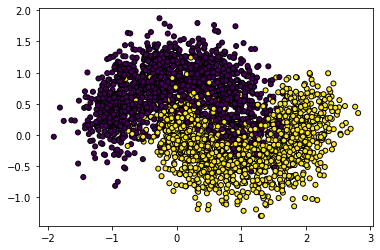

In [15]:
from sklearn.datasets import make_moons

X_synth_data,y_synth_data =  make_moons(3000, noise=0.3, random_state=42)
X_label_0,y_label_0 = X_synth_data[y_synth_data==0],y_synth_data[y_synth_data==0]
X_label_1,y_label_1 = X_synth_data[y_synth_data==1],y_synth_data[y_synth_data==1]
number_synth_data = 50
models_synth_data = []
accuracy_scores_synth_data = np.zeros(number_synth_data)
false_negativ_scores_synth_data = np.zeros(number_synth_data)
plt.scatter(X_synth_data[:, 0], X_synth_data[:, 1], marker="o", c=y_synth_data, s=25, edgecolor="k")
print("Numbers of label 0 in set:",len(y_synth_data[y_synth_data==0]))
print("Numbers of label 1 in set:",len(y_synth_data[y_synth_data==1]))

In [16]:
## Helper function for visualization
def plot_decision_boundary(model, X, y):
    '''
    Plot the decision boundaries of a model trained on 2 dimensionnal data, as
    well as the scatter plot of the data X, using the target values in y for 
    the colors.
    ----------------------
    Input
            - model : Scikit-learn style estimator, already trained, must have
                    a .predict method
            - X : Data for scatter plot, must have 2 features.
            - y : Target classes for scatter plot colors
    '''
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole grid
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx1.shape)
    fig = plt.figure(figsize=(10,20))
    fig.suptitle('Suptitle')
    axs = fig.subplots(3, sharex=True, sharey=True)
    axs[0].contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
    axs[1].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    axs[2].contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
    axs[2].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.show()

We train models on training sets taht are more or less unbalance : at the beginning we have a balance training set, and we slowly unbalance it to have at the end an unbalance dataset.

In [17]:
for k in range(1,number_synth_data+1):
    factor_0 = (k-1)/(number_synth_data)*(0.001-0.2)
    factor_1 = (k-1)/(number_synth_data)*(0.399-0.2)
    X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size= 0.2 + factor_0)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size= 0.2 + factor_1)
    X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
    X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])
    
    train_indexes = np.arange(len(X_train))
    np.random.shuffle(train_indexes)
    X_train = X_train[train_indexes]
    y_train = y_train[train_indexes]

    test_indexes = np.arange(len(X_test))
    np.random.shuffle(test_indexes)
    X_test = X_test[test_indexes]
    y_test = y_test[test_indexes]

    test_error_synth_data,score_false_negativ_synth_data,model_synth_data = SVM(X_train,X_test,y_train,y_test)
    models_synth_data.append(model_synth_data)
    accuracy_scores_synth_data[k-1] = test_error_synth_data
    if len(y_test[y_test==1]) !=0 :
        false_negativ_scores_synth_data[k-1] = score_false_negativ_synth_data/len(y_test[y_test==1])

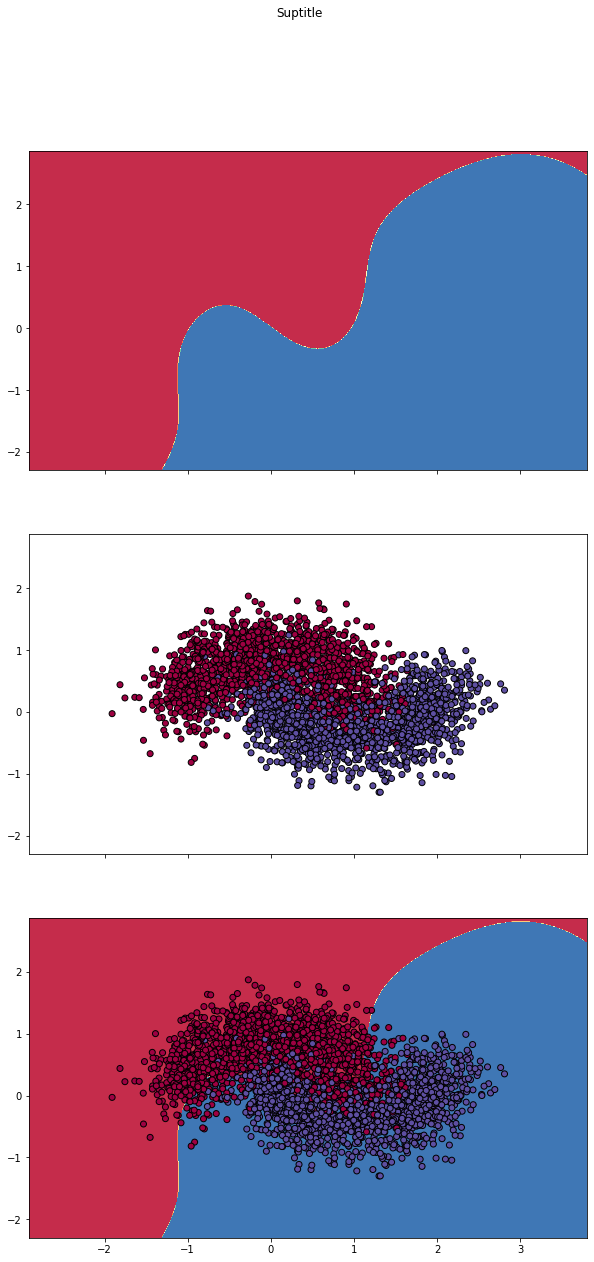

In [18]:
#model we want between 0 and number_synth_data-1, feel free to vizualize the model you want !
index_model = 0
plot_decision_boundary(models_synth_data[index_model], X_synth_data, y_synth_data)

We plot the accuracy scores for each model

Text(0, 0.5, 'Accuracy score')

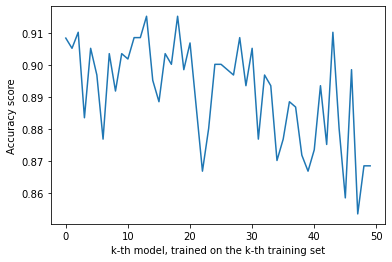

In [20]:
plt.plot(accuracy_scores_synth_data)
plt.xlabel("k-th model, trained on the k-th training set")
plt.ylabel("Accuracy score")

We plot the false negative scores for each model

Text(0, 0.5, 'False negative score')

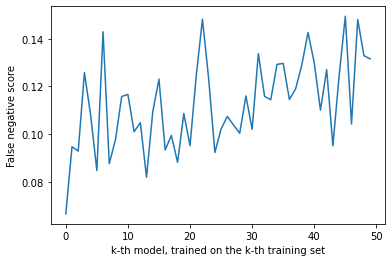

In [21]:
plt.plot(false_negativ_scores_synth_data)
plt.xlabel("k-th model, trained on the k-th training set")
plt.ylabel("False negative score")

### Analyze

Even though the values are fluctuating a lot, we clearly see that the more is unbalance the training dataset, the less the models performs in terms of accuracy and false negative scores. We conclude on the importance of having a balance training dataset when fitting the model.